Title: DSC350 Week 6 Exercises 
Author: Stefanie Molin  
Date: 26 October 2024  
Modified By: Caleb Trimble  
Description: This program executes various functions. It creates randomly generated arrays, creates various types of files, and provides the results. It also uses BeautifulSoup to scrape an HTML file for specific information. 
Codes in this program have been adapted from Hands-On Data Analysis with Pandas - Second Edition (Molin S., 2021)

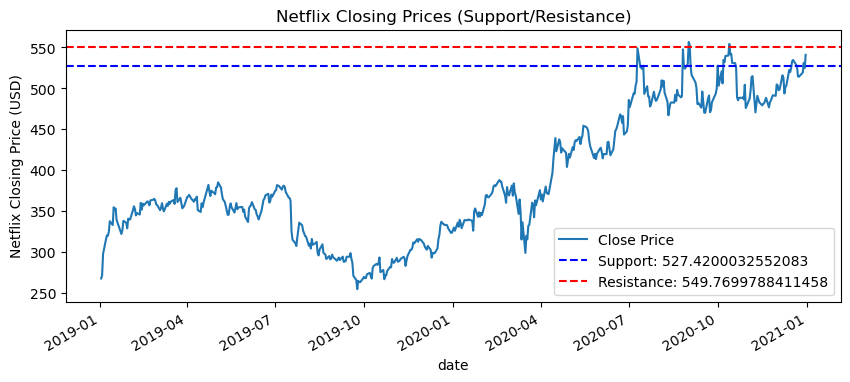

In [1]:
import pandas as pd
from stock_analysis import StockVisualizer, StockAnalyzer
import matplotlib.pyplot as plt

# Load data, change date format to datetime and set the index as the date column.
nflx_data = pd.read_csv('netflix.csv')
nflx_data['date'] = pd.to_datetime(nflx_data['date'])
nflx_data.set_index('date', inplace=True)

# Calculates support and resistance levels using the StockAnalyzer module of stock_analysis.
analyzer = StockAnalyzer(nflx_data)
support = analyzer.support()
resistance = analyzer.resistance()

# Plots the closing prices as a solid line.
fig, ax = plt.subplots(figsize=(10, 4))
nflx_data['close'].plot(ax=ax, title="Netflix Closing Prices (Support/Resistance)", label='Close Price')

# Adds support and resistance levels as broken lines and prints the resulting plot.
ax.axhline(y=support, color='blue', linestyle='--', label=f'Support: {support}')
ax.axhline(y=resistance, color='red', linestyle='--', label=f'Resistance: {resistance}')

ax.set_ylabel('Netflix Closing Price (USD)')
plt.legend()
plt.show()


                  open        high         low       close       open  \
                    FB          FB          FB          FB       AAPL   
date                                                                    
2019-01-02  128.990005  137.509995  128.559998  135.679993  38.722500   
2019-01-03  134.690002  137.169998  131.119995  131.740005  35.994999   
2019-01-04  134.009995  138.000000  133.750000  137.949997  36.132500   
2019-01-07  137.559998  138.869995  135.910004  138.050003  37.174999   
2019-01-08  139.889999  143.139999  139.539993  142.529999  37.389999   

                 high        low      close         open         high  \
                 AAPL       AAPL       AAPL         AMZN         AMZN   
date                                                                    
2019-01-02  39.712502  38.557499  39.480000  1465.199951  1553.359985   
2019-01-03  36.430000  35.500000  35.547501  1520.010010  1538.000000   
2019-01-04  37.137501  35.950001  37.064999  1530.

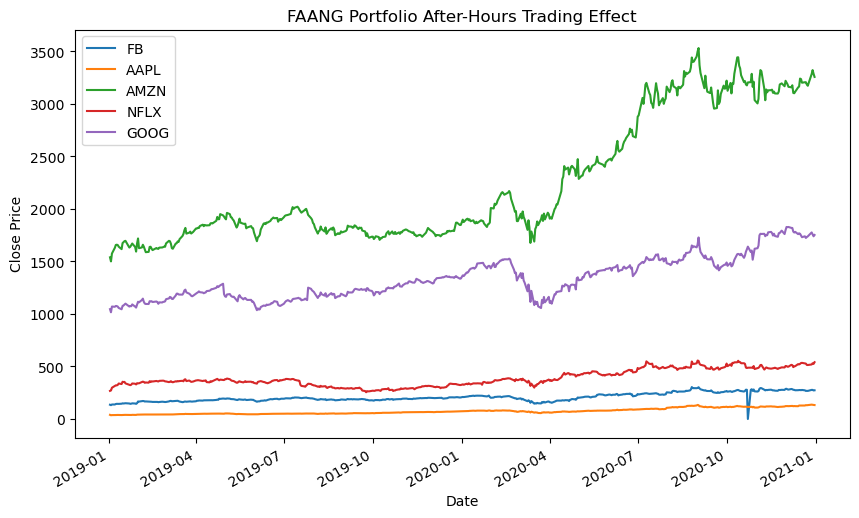

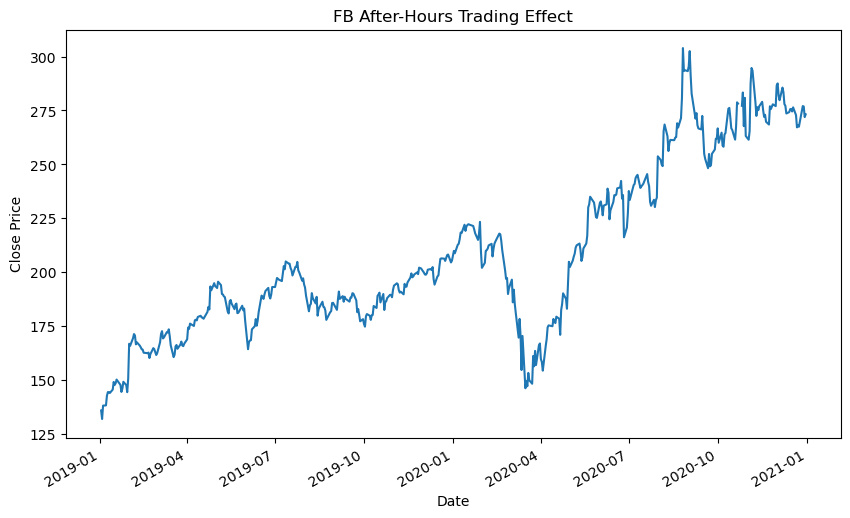

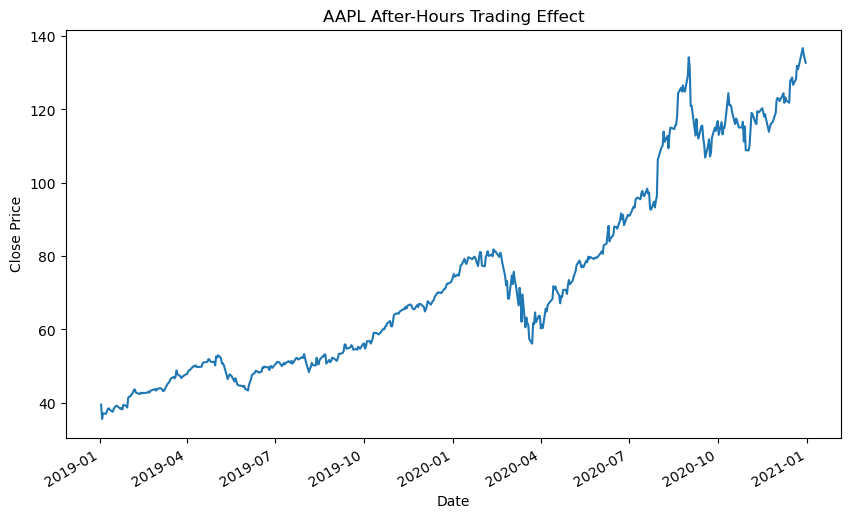

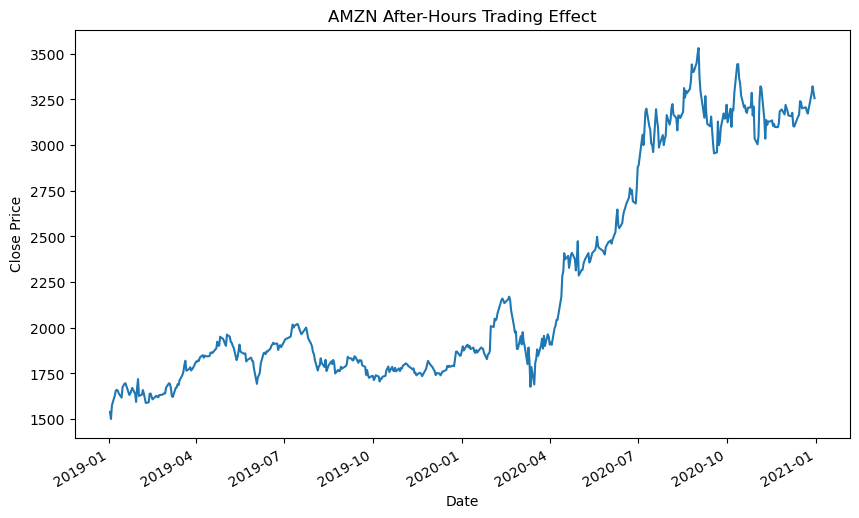

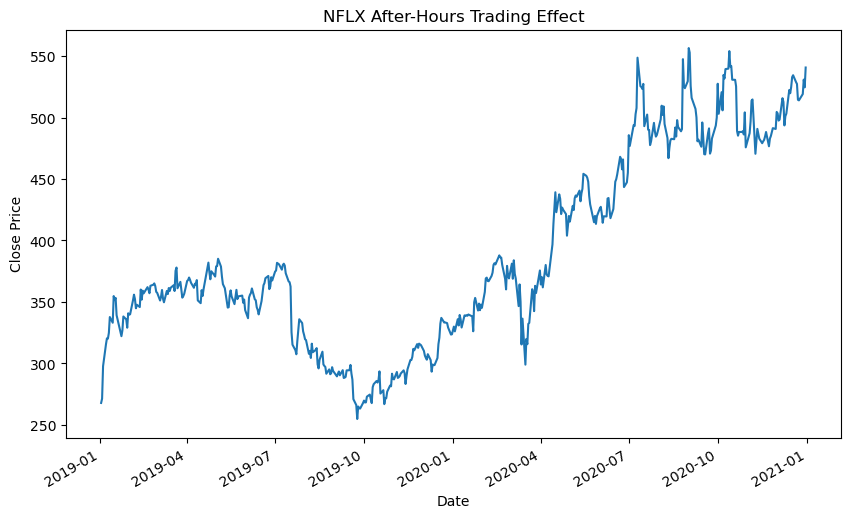

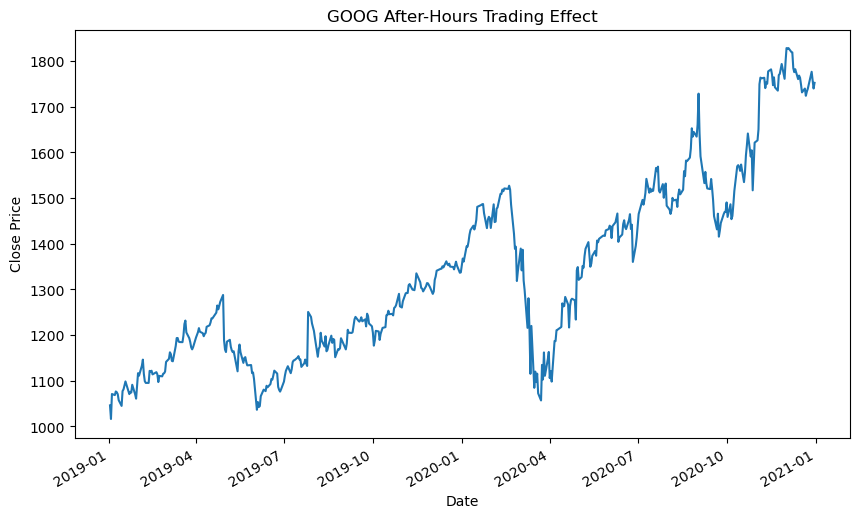

In [2]:
fb = pd.read_csv('facebook.csv')
aapl = pd.read_csv('apple.csv')
amzn = pd.read_csv('amazon.csv')
nflx = pd.read_csv('netflix.csv')
goog = pd.read_csv('google.csv')

# Processes each DataFrame with necessary columns
for df in [fb, aapl, amzn, nflx, goog]:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

# There were issues with the program identifying the columns, so this step defines what columns are required.
fb_data = fb[['open', 'high', 'low', 'close']]
aapl_data = aapl[['open', 'high', 'low', 'close']]
amzn_data = amzn[['open', 'high', 'low', 'close']]
nflx_data = nflx[['open', 'high', 'low', 'close']]
goog_data = goog[['open', 'high', 'low', 'close']]

# Ensures the combined DataFrame structure is correct
combined_data = pd.concat(
    [fb_data, aapl_data, amzn_data, nflx_data, goog_data],
    axis=1,
    keys=['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# Creates the portfolio - this step is why the column specifications were required. I received an error numerous times stating the data didn't contain the required columns.
def make_portfolio(combined_data, date_level='date'):
    return combined_data.groupby(level=date_level).sum()

# Simplifies the DataFrame for portfolio creation
flattened_data = combined_data.swaplevel(axis=1)

try:
    portfolio = make_portfolio(flattened_data)
    print(portfolio.head())
except Exception as e:
    print(f"Error in portfolio creation: {e}")

# Plots the overall portfolio
fig, ax = plt.subplots(figsize=(10, 6))
portfolio['close'].plot(ax=ax, title="FAANG Portfolio After-Hours Trading Effect")
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
plt.show()

# Plots each stock individually
for company in ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']:
    fig2, ax = plt.subplots(figsize=(10, 6))
    combined_data[company]['close'].plot(ax=ax, title=f"{company} After-Hours Trading Effect")
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    plt.show()



                    FB                                           AAPL  \
                  open        high         low       close       open   
date                                                                    
2019-01-02  128.990005  137.509995  128.559998  135.679993  38.722500   
2019-01-03  134.690002  137.169998  131.119995  131.740005  35.994999   
2019-01-04  134.009995  138.000000  133.750000  137.949997  36.132500   
2019-01-07  137.559998  138.869995  135.910004  138.050003  37.174999   
2019-01-08  139.889999  143.139999  139.539993  142.529999  37.389999   

                                                    AMZN               \
                 high        low      close         open         high   
date                                                                    
2019-01-02  39.712502  38.557499  39.480000  1465.199951  1553.359985   
2019-01-03  36.430000  35.500000  35.547501  1520.010010  1538.000000   
2019-01-04  37.137501  35.950001  37.064999  1530.

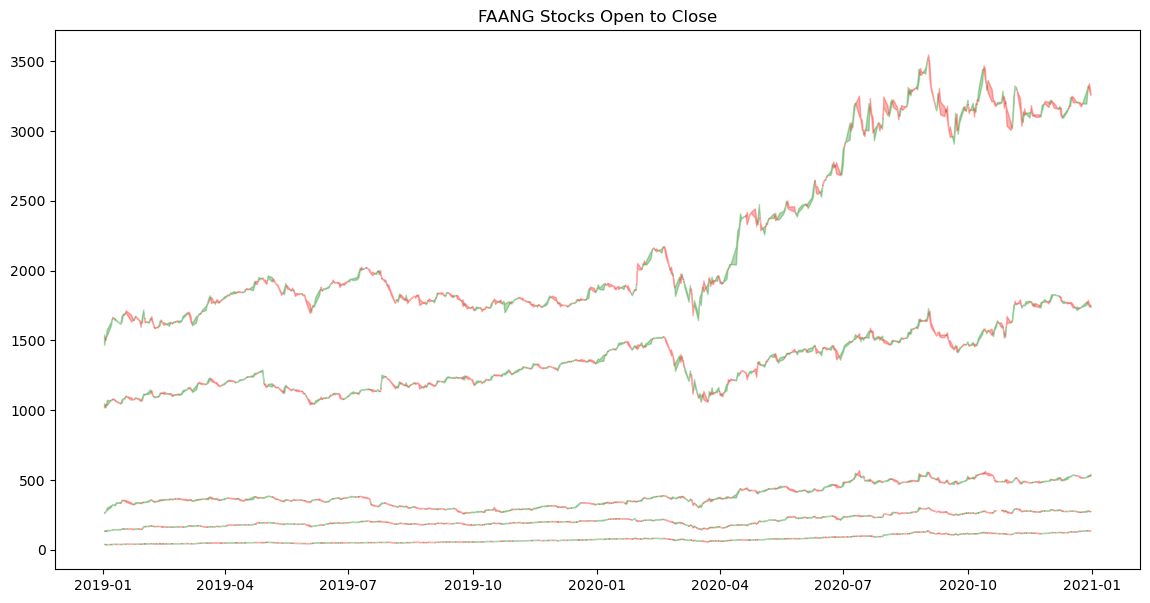

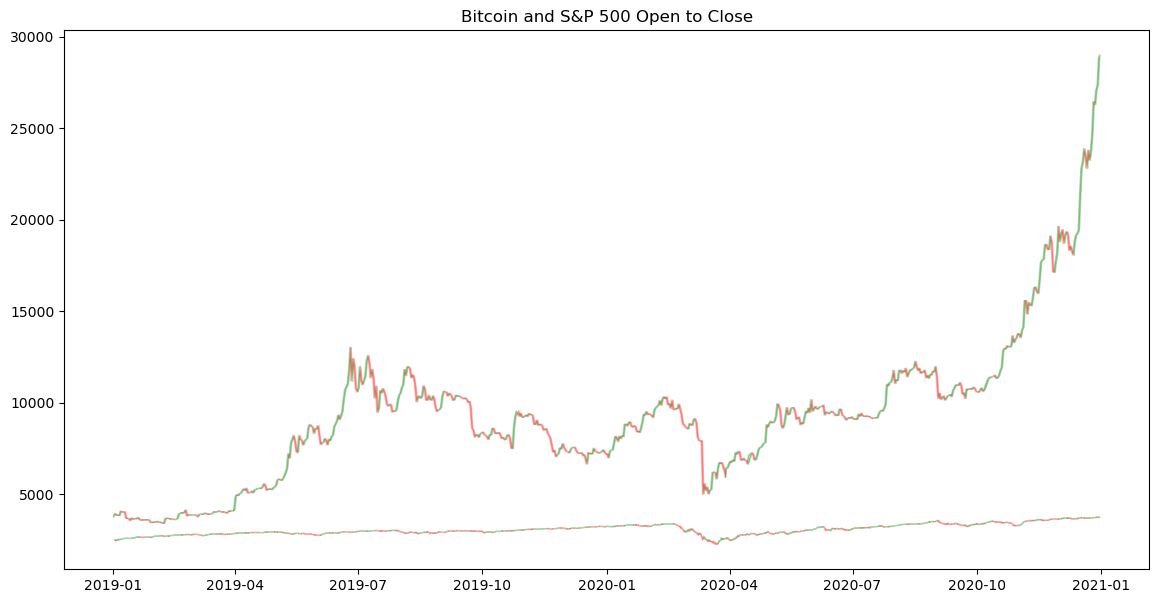

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

fb = pd.read_csv('facebook.csv')
aapl = pd.read_csv('apple.csv')
amzn = pd.read_csv('amazon.csv')
nflx = pd.read_csv('netflix.csv')
goog = pd.read_csv('google.csv')

# Processes each DataFrame
for df in [fb, aapl, amzn, nflx, goog]:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

fb_data = fb[['open', 'high', 'low', 'close']]
aapl_data = aapl[['open', 'high', 'low', 'close']]
amzn_data = amzn[['open', 'high', 'low', 'close']]
nflx_data = nflx[['open', 'high', 'low', 'close']]
goog_data = goog[['open', 'high', 'low', 'close']]

# Combines DataFrames, maintaining all necessary columns
combined_data = pd.concat(
    [fb_data, aapl_data, amzn_data, nflx_data, goog_data],
    axis=1,
    keys=['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']
)

# Simplifies make_portfolio function
def make_portfolio(combined_data, date_level='date'):
    return combined_data.groupby(level=date_level).sum()

portfolio = make_portfolio(combined_data)

# Ensures portfolio DataFrame includes required columns
print(portfolio.head())

# Creates a matplotlib visualization for each stock
fig3, ax = plt.subplots(figsize=(14, 7))

for company in ['FB', 'AAPL', 'AMZN', 'NFLX', 'GOOG']:
    open_col = combined_data[company]['open']
    close_col = combined_data[company]['close']
    ax.fill_between(open_col.index, open_col, close_col, 
                    where=(close_col > open_col), color='green', alpha=0.3, interpolate=True)
    ax.fill_between(open_col.index, open_col, close_col, 
                    where=(close_col <= open_col), color='red', alpha=0.3, interpolate=True)

ax.set_title('FAANG Stocks Open to Close')
plt.show()

# Bonus! 
btc = pd.read_csv('bitcoin.csv')
sp500 = pd.read_csv('sp500.csv')

for df in [btc, sp500]:
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

btc_data = btc[['open', 'high', 'low', 'close']]
sp500_data = sp500[['open', 'high', 'low', 'close']]

# Visualizes Bitcoin and S&P 500 open to close changes
fig4, ax = plt.subplots(figsize=(14, 7))

for data, label in [(btc_data, 'BTC'), (sp500_data, 'S&P 500')]:
    open_col = data['open']
    close_col = data['close']
    ax.fill_between(open_col.index, open_col, close_col, 
                    where=(close_col > open_col), color='green', alpha=0.3, interpolate=True, label=label)
    ax.fill_between(open_col.index, open_col, close_col, 
                    where=(close_col <= open_col), color='red', alpha=0.3, interpolate=True, label=label)

ax.set_title('Bitcoin and S&P 500 Open to Close')
plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL DataFrame head:
             open_aapl  high_aapl   low_aapl  close_aapl  adj close_aapl  \
Date                                                                      
2020-01-02  74.059998  75.150002  73.797501   75.087502       72.876114   
2020-01-03  74.287498  75.144997  74.125000   74.357498       72.167595   
2020-01-06  73.447502  74.989998  73.187500   74.949997       72.742661   
2020-01-07  74.959999  75.224998  74.370003   74.597504       72.400543   
2020-01-08  74.290001  76.110001  74.290001   75.797501       73.565186   

            volume_aapl  
Date                     
2020-01-02    135480400  
2020-01-03    146322800  
2020-01-06    118387200  
2020-01-07    108872000  
2020-01-08    132079200  
AMZN DataFrame head:
             open_amzn  high_amzn   low_amzn  close_amzn  adj close_amzn  \
Date                                                                      
2020-01-02  93.750000  94.900497  93.207497   94.900497       94.900497   
2020-01-03  93.224998  

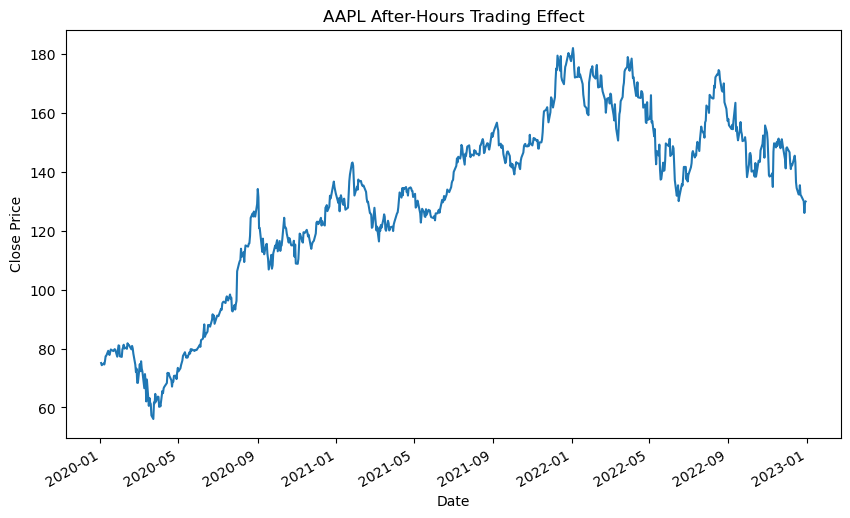

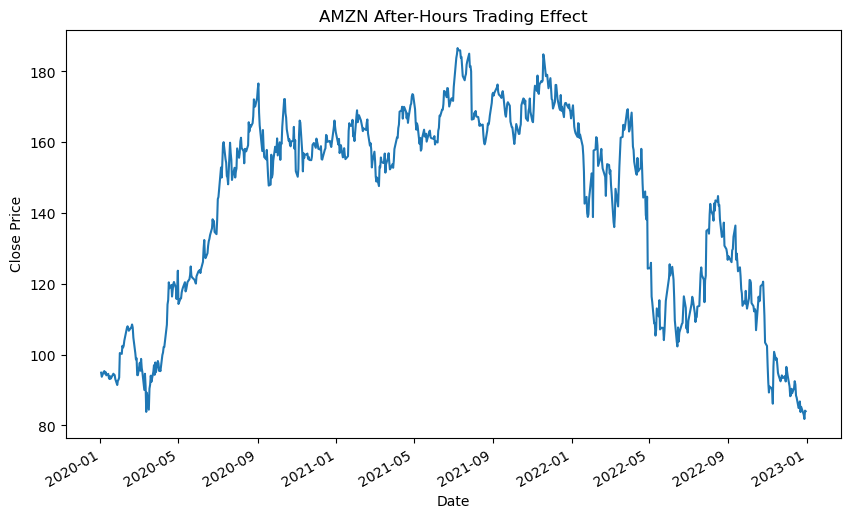

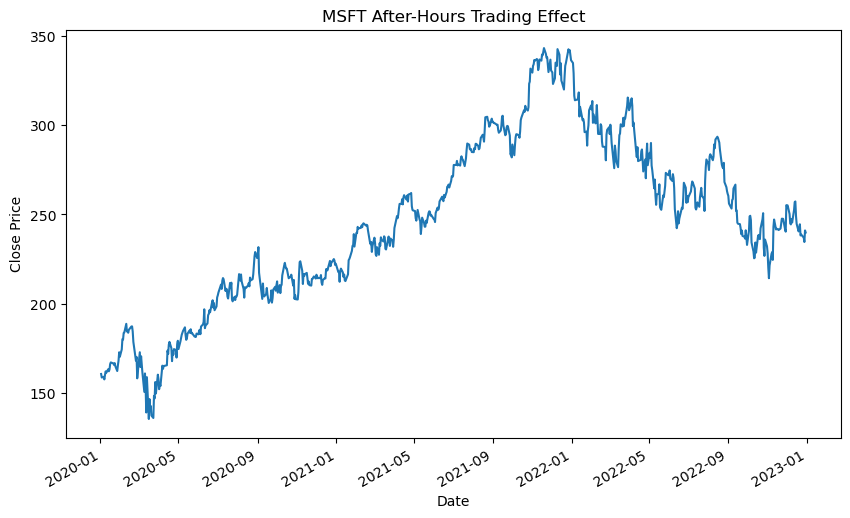

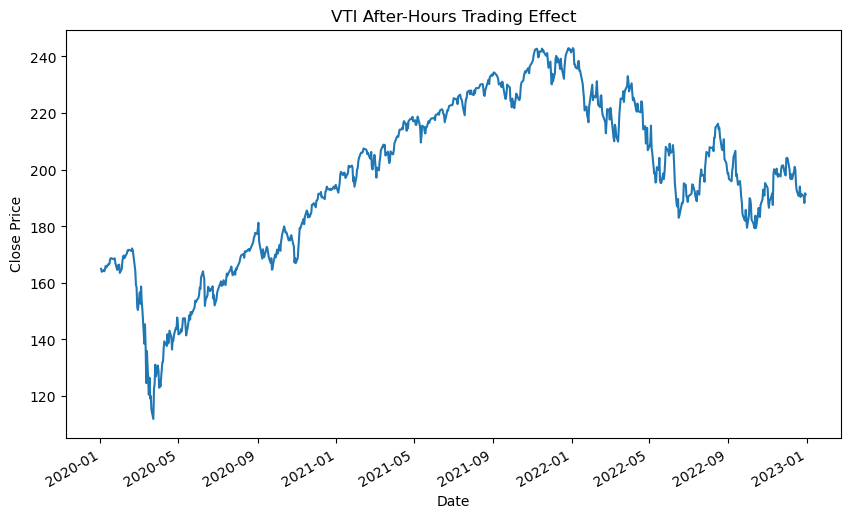

Annualized Volatility: {'aapl': 0.36937411462675074, 'amzn': 0.39084378976634043, 'msft': 0.34772084308609086, 'vti': 0.2568031827630897}


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Downloads stock data from yfinance
assets = ['AAPL', 'AMZN', 'MSFT', 'VTI']
analyzers = {}

for asset in assets:
    data = yf.download(asset, start="2020-01-01", end="2023-01-01")
    data.columns = [f"{col.lower()}_{asset.lower()}" for col in data.columns]
    analyzers[asset] = data

# Confirms the analyzers content
for asset, df in analyzers.items():
    print(f"{asset} DataFrame head:\n", df.head())

# Visualizes each stock
for asset in assets:
    fig, ax = plt.subplots(figsize=(10, 6))
    analyzers[asset][f'close_{asset.lower()}'].plot(ax=ax, title=f"{asset} After-Hours Trading Effect")
    ax.set_xlabel('Date')
    ax.set_ylabel('Close Price')
    plt.show()

# Defines the AssetGroupAnalyzer for annualized volatility.
class AssetGroupAnalyzer:
    def __init__(self, dataframes):
        self.dataframes = dataframes

    def annualized_volatility(self):
        volatilities = {}
        for df in self.dataframes:
            asset = df.columns[0].split('_')[1]
            vol = df[f'close_{asset}'].pct_change().std() * np.sqrt(252)
            volatilities[asset] = vol
        return volatilities

# Ensures the correct DataFrame input for AssetGroupAnalyzer
group_analyzer = AssetGroupAnalyzer([analyzers[asset] for asset in assets])
annualized_volatility = group_analyzer.annualized_volatility()
print('Annualized Volatility:', annualized_volatility)


In [16]:
import pandas as pd
import yfinance as yf
from stock_analysis import StockAnalyzer, StockReader

# Defines the start and end dates
start_date = "2020-01-01"
end_date = "2023-01-01"

# Initializes the stock reader
reader = StockReader(start=start_date, end=end_date)

# Downloads the selected stock data from yfinance.
ticker = 'AAPL'
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Ensures proper column names and reset index
stock_data.columns = [col.lower() for col in stock_data.columns]
stock_data.reset_index(inplace=True)
stock_data.rename(columns={'Date': 'date'}, inplace=True)  # Rename 'Date' to 'date'

# Confirms 'date' column is present - due to numerous errors with 'date' not existing, this function is used to debug problems with column issues.
if 'date' not in stock_data.columns:
    raise KeyError("'date' column is missing from stock_data")

# Downloads index data
index_ticker = '^GSPC'
index_data_full = yf.download(index_ticker, start=start_date, end=end_date)

# Ensures the proper column names and resets index
index_data_full.columns = [col.lower() for col in index_data_full.columns]
index_data_full.reset_index(inplace=True)
index_data_full.rename(columns={'Date': 'date', 'adj close': 'close'}, inplace=True)

# Removes duplicate 'close' column if present
index_data_full = index_data_full.loc[:, ~index_data_full.columns.duplicated()]

# Confirms 'date' and 'close' columns are present
if 'date' not in index_data_full.columns or 'close' not in index_data_full.columns:
    raise KeyError("'date' or 'close' column is missing from index_data_full")

# Converts 'date' columns to datetime using .loc
stock_data.loc[:, 'date'] = pd.to_datetime(stock_data['date'])
index_data_full.loc[:, 'date'] = pd.to_datetime(index_data_full['date'])
stock_data.set_index('date', inplace=True)
index_data_full.set_index('date', inplace=True)
print(stock_data.head())
print(index_data_full.head())

stock_analyzer = StockAnalyzer(stock_data)

# Defines portfolio_return to handle IndexError
def portfolio_return(df):
    if 'close' not in df.columns:
        raise KeyError("'close' column is missing from dataframe")
    
    if len(df) < 1:
        raise ValueError("Dataframe is empty")
    
    try:
        start, end = df['close'].iloc[0], df['close'].iloc[-1]
    except IndexError:
        raise IndexError("Dataframe index out of range")
    
    return (end - start) / start

# Overrides portfolio_return method in StockAnalyzer
StockAnalyzer.portfolio_return = staticmethod(portfolio_return)

# Defines the analysis function
def analyze_stock(stock_analyzer, index_data_full, r_f):
    methods = {
        'alpha': lambda sa: sa.alpha(index=index_data_full, r_f=r_f),
        'beta': lambda sa: sa.beta(index=index_data_full),
        'sharpe_ratio': lambda sa: sa.sharpe_ratio(r_f=r_f),
        'annualized_volatility': lambda sa: sa.annualized_volatility(),
        'is_bear_market': lambda sa: sa.is_bear_market(),
        'is_bull_market': lambda sa: sa.is_bull_market()
    }

    results = {method: func(stock_analyzer) for method, func in methods.items()}
    return pd.DataFrame([results])

# Gets the risk-free rate from StockReader
r_f = reader.get_risk_free_rate_of_return()

# Runs the analysis function
result = analyze_stock(stock_analyzer, index_data_full, r_f)

# Print the results
print(result)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


                 open       high        low      close  adj close     volume
date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876114  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167595  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400543  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565186  132079200
                   open         high          low        close      volume
date                                                                      
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3459930000
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3484700000
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3702460000
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3435910000
2020-01-08 